In [15]:
import csv

csv_file = 'staff_diplom.csv'  # Путь к исходному CSV файлу
txt_file = 'output.txt'  # Путь к выходному TXT файлу
with open(csv_file, mode='r', encoding='utf-8') as csv_input, \
     open(txt_file, mode='w', encoding='utf-8') as txt_output:
    csv_reader = csv.reader(csv_input)
    it = iter(csv_reader)
    next(it)
    for row in it:
        s = row[0]
        s = s.split(';')
        txt_output.write(s[2][1:-1] + '\n')

In [16]:
import json, re
with open("anchor.json", "r", encoding="utf-8") as file:
    anchors = json.load(file)
groups = dict((i,0) for i in anchors.keys())
groups["other"] = 0
with open(csv_file, mode="r", encoding='utf-8') as csv_input, \
    open("tmp~1.csv", mode="w", encoding='utf-8') as csv_output:
    it = iter(csv_input.readlines())
    csv_output.write(str(next(it)))
    for row in it:
        title=row.split(';')[2][1:-1]
        for i in groups:
            if i == "other":
                groups[i] += 1
                csv_output.write(row[:-1]+';\"'+i+'\"\n')
                break
            ok = False
            for ii in title.split(' '):
                for iii in anchors[i]:
                    if re.match(iii.lower(),ii.lower()):
                        ok = True
                        break
                if ok:
                    break
            if ok:
                groups[i] += 1
                csv_output.write(row[:-1]+';\"'+i+'\"\n')
                break
print(groups)



{'Finance': 239, 'Data/Ml/AI/Compputer_Vision': 341, 'natural_sciences': 370, 'Control': 292, 'Numerical_Methods/Optimization': 326, 'Game_Theory/probability/statistics': 343, 'IT/software_engineering': 326, 'Education': 33, 'other': 1013}


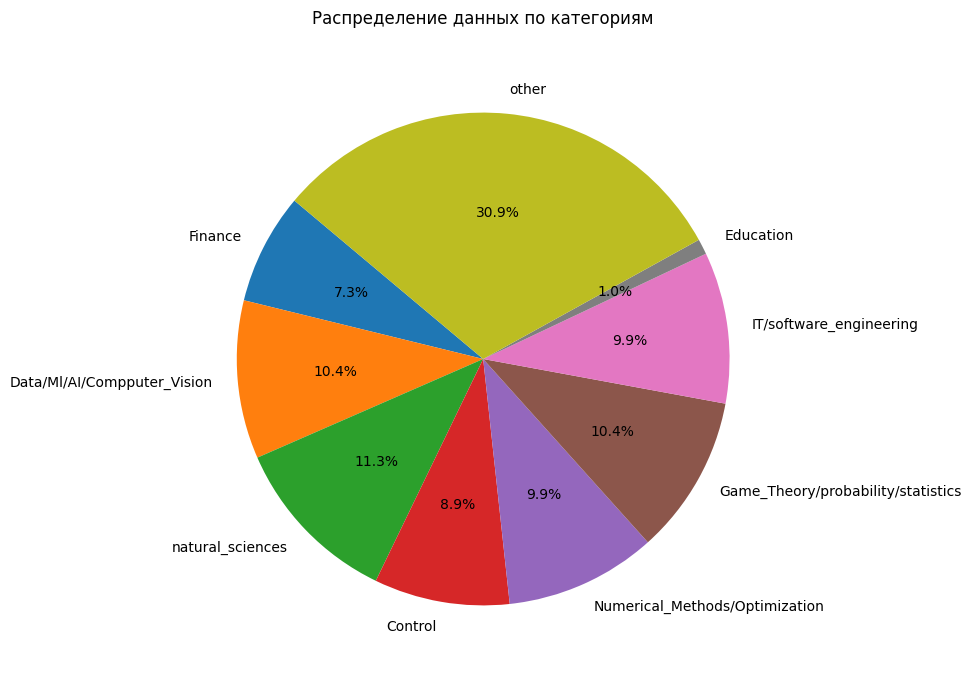

In [17]:
import matplotlib.pyplot as plt

categories = list(groups.keys())
values = list(groups.values())

# Создаем круговую диаграмму
plt.figure(figsize=(10, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)

# Добавляем заголовок
plt.title('Распределение данных по категориям', pad=20)

# Показываем диаграмму
plt.show()